In [ ]:
# Text data is any human language stored for computers to read and analyze (sentences, chats,
# reviews, articles).
# ​
# Below is a compact teaching‑oriented script that: defines forms and applications,
#  preprocesses text (tokenization, normalization, stopwords, stemming, lemmatization), and
#   visualizes word frequencies.

# What is text data & forms
# Text data: collections of words, sentences, or documents used for analysis or model training.
# ​

# Common forms:

# Short text: tweets, chat messages, search queries.
# ​

# Long text: news articles, blogs, reports, books.
# ​

# Semi‑structured: emails, logs, HTML, JSON with text fields.
# ​

# Labeled vs unlabeled: e.g., reviews with sentiment labels vs raw corpora.
# ​

# Typical applications:

# Sentiment analysis, topic classification, spam detection.
# ​

# Information retrieval, question answering, summarization, translation.
# ​

# Full Python code: preprocessing + visualization


# ---------------------------------------
# 0. Install (if needed, in a notebook)
# ---------------------------------------
# pip install nltk wordcloud matplotlib

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# ---------------------------------------
# 1. Example raw text corpus
# ---------------------------------------
texts = [
    "Natural Language Processing (NLP) helps computers understand human language.",
    "Text data appears in emails, chat messages, product reviews, and social media posts!",
    "Good preprocessing cleans, tokenizes, normalizes, removes stopwords, and reduces words to their base forms.",
    "We can then visualize common words to understand topics and sentiment in the text."
]

raw_text = " ".join(texts)

print("RAW TEXT:\n", raw_text)

# Uses a tiny synthetic corpus covering multiple domains.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


RAW TEXT:
 Natural Language Processing (NLP) helps computers understand human language. Text data appears in emails, chat messages, product reviews, and social media posts! Good preprocessing cleans, tokenizes, normalizes, removes stopwords, and reduces words to their base forms. We can then visualize common words to understand topics and sentiment in the text.


In [ ]:
# 2. Tokenization & normalization
# ---------------------------------------
# 2. Tokenization and normalization
# ---------------------------------------

import nltk
nltk.download('punkt_tab')

# Tokenization: split text into individual tokens (words). [web:112][web:128]
tokens = word_tokenize(raw_text)

print("\nTOKENS (first 20):", tokens[:20])

# Normalization:
# - lowercasing
# - removing simple punctuation tokens
tokens_lower = [t.lower() for t in tokens]

punct = {".", ",", "!", "?", "(", ")", ";", ":", "-", "'s"}
tokens_clean = [t for t in tokens_lower if t not in punct]

print("\nNORMALIZED TOKENS (first 20):", tokens_clean[:20])

# Tokenization turns unstructured strings into a list of units for further processing.
# \n

# Normalization often includes lowercasing and punctuation removal for consistency.
# \n


[nltk_data] Downloading package punkt_tab to /root/nltk_data...



TOKENS (first 20): ['Natural', 'Language', 'Processing', '(', 'NLP', ')', 'helps', 'computers', 'understand', 'human', 'language', '.', 'Text', 'data', 'appears', 'in', 'emails', ',', 'chat', 'messages']

NORMALIZED TOKENS (first 20): ['natural', 'language', 'processing', 'nlp', 'helps', 'computers', 'understand', 'human', 'language', 'text', 'data', 'appears', 'in', 'emails', 'chat', 'messages', 'product', 'reviews', 'and', 'social']


[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
# 3. Stopwords removal, stemming, lemmatization

# ---------------------------------------
# 3. Stopwords, stemming, lemmatization
# ---------------------------------------
english_stop = set(stopwords.words('english'))  # common function words. [web:116][web:115]

# Remove stopwords
tokens_nostop = [t for t in tokens_clean if t not in english_stop]
print("\nAFTER STOPWORD REMOVAL (first 20):", tokens_nostop[:20])

# Stemming: crude rule-based cutting to root. [web:114][web:115]
stemmer = PorterStemmer()
stems = [stemmer.stem(t) for t in tokens_nostop]
print("\nSTEMS (first 20):", stems[:20])

# Lemmatization: dictionary-based base form, more accurate. [web:114][web:119][web:122]
lemmatizer = WordNetLemmatizer()
lemmas = [lemmatizer.lemmatize(t) for t in tokens_nostop]
print("\nLEMMAS (first 20):", lemmas[:20])
# Stopwords are very frequent words (the, is, and) that often carry little topical meaning.

# Stemming is fast but can produce non‑words; lemmatization uses vocabulary and grammar to get valid lemmas.



AFTER STOPWORD REMOVAL (first 20): ['natural', 'language', 'processing', 'nlp', 'helps', 'computers', 'understand', 'human', 'language', 'text', 'data', 'appears', 'emails', 'chat', 'messages', 'product', 'reviews', 'social', 'media', 'posts']

STEMS (first 20): ['natur', 'languag', 'process', 'nlp', 'help', 'comput', 'understand', 'human', 'languag', 'text', 'data', 'appear', 'email', 'chat', 'messag', 'product', 'review', 'social', 'media', 'post']

LEMMAS (first 20): ['natural', 'language', 'processing', 'nlp', 'help', 'computer', 'understand', 'human', 'language', 'text', 'data', 'appears', 'email', 'chat', 'message', 'product', 'review', 'social', 'medium', 'post']


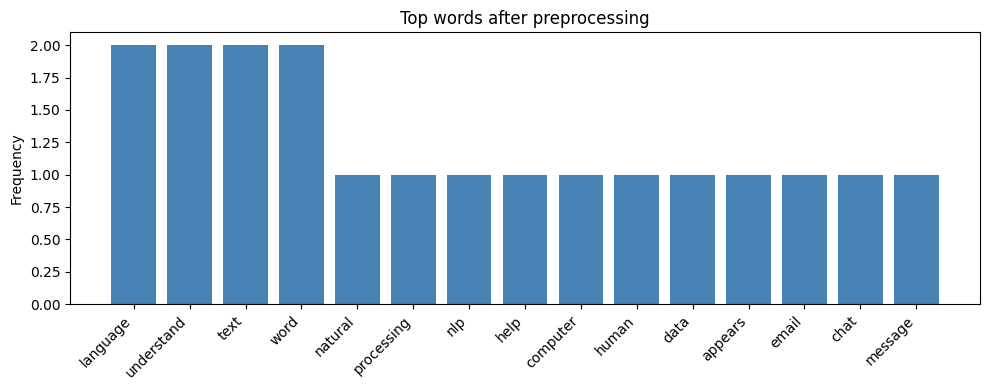

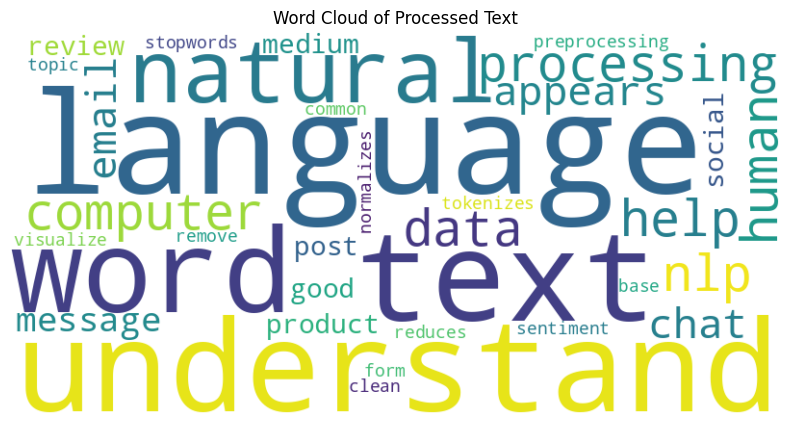

In [ ]:
# 4. Visualization: frequency bar chart & word cloud

# ---------------------------------------
# 4. Visualize preprocessed text
# ---------------------------------------

# Use lemmatized tokens for frequency analysis
freq = Counter(lemmas)

# Show top 15 words
most_common = freq.most_common(15)
words = [w for w, c in most_common]
counts = [c for w, c in most_common]

plt.figure(figsize=(10, 4))
plt.bar(words, counts, color="steelblue")
plt.xticks(rotation=45, ha="right")
plt.title("Top words after preprocessing")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Word cloud visualization. [web:118][web:121][web:130]
text_for_cloud = " ".join(lemmas)
wc = WordCloud(width=800, height=400, background_color="white").generate(text_for_cloud)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Processed Text")
plt.show()

# Frequency bar charts and word clouds help quickly inspect dominant terms in a corpus.

# Using preprocessed tokens (after stopwords, lemmatization) highlights content words rather than function words.

In [ ]:
# Install (in notebook if needed)
# pip install scikit-learn

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np


# CountVectorizer implements Bag of Words.

# TfidfVectorizer computes TF‑IDF weights.

# LogisticRegression is a common linear model for text classification.

# ---------------------------------------
# 1. Example product reviews with labels
# ---------------------------------------
texts = [
    "Amazing phone, battery life is great and camera is fantastic",
    "Terrible phone, battery dies quickly and screen is awful",
    "Really happy with this purchase, works smoothly",
    "Very disappointed, the device keeps freezing and crashing",
    "Excellent quality and value for money",
    "Worst product I have ever bought",
    "Good performance but battery could be better",
    "Not worth the price, very bad experience",
    "I love this phone, super fast and reliable",
    "I hate this phone, slow and buggy"
]

# 1 = positive, 0 = negative
labels = np.array([1,0,1,0,1,0,1,0,1,0])

# This mimics real review text with positive/negative sentiment labels.


# 2. Bag of Words representation
# ---------------------------------------
# 2. Bag of Words (CountVectorizer)
# ---------------------------------------
bow_vectorizer = CountVectorizer(lowercase=True, stop_words="english")  # simple preprocessing [web:132]
X_bow = bow_vectorizer.fit_transform(texts)

print("BoW shape:", X_bow.shape)           # (documents, vocabulary_size)
print("Sample vocabulary (first 20):", list(bow_vectorizer.vocabulary_.keys())[:20])

# BoW counts how often each word appears in each document, ignoring order.

# Result is a sparse document‑term matrix suitable for ML models.

# 3. TF‑IDF representation

# ---------------------------------------
# 3. TF-IDF representation
# ---------------------------------------
tfidf_vectorizer = TfidfVectorizer(lowercase=True, stop_words="english")
X_tfidf = tfidf_vectorizer.fit_transform(texts)

print("TF-IDF shape:", X_tfidf.shape)
feature_names = tfidf_vectorizer.get_feature_names_out()
print("Example terms:", feature_names[:15])

# TF‑IDF = term frequency × inverse document frequency, up‑weighting words that are common in a
#  document but rare overall.

# Often improves performance over raw counts for tasks like sentiment or spam detection.

# 4. Train sentiment classifier (BoW vs TF‑IDF)

# ---------------------------------------
# 4. Train/test split
# ---------------------------------------
X_bow_train, X_bow_test, y_train, y_test = train_test_split(
    X_bow, labels, test_size=0.3, random_state=42, stratify=labels
)

X_tfidf_train, X_tfidf_test, _, _ = train_test_split(
    X_tfidf, labels, test_size=0.3, random_state=42, stratify=labels
)

# ---------------------------------------
# 4a. Logistic Regression with BoW
# ---------------------------------------
bow_clf = LogisticRegression(max_iter=1000)
bow_clf.fit(X_bow_train, y_train)

y_pred_bow = bow_clf.predict(X_bow_test)

print("\n=== BoW + Logistic Regression ===")
print(classification_report(y_test, y_pred_bow, target_names=["negative","positive"]))
print("Confusion matrix (BoW):\n", confusion_matrix(y_test, y_pred_bow))

# ---------------------------------------
# 4b. Logistic Regression with TF-IDF
# ---------------------------------------
tfidf_clf = LogisticRegression(max_iter=1000)
tfidf_clf.fit(X_tfidf_train, y_train)

y_pred_tfidf = tfidf_clf.predict(X_tfidf_test)

print("\n=== TF-IDF + Logistic Regression ===")
print(classification_report(y_test, y_pred_tfidf, target_names=["negative","positive"]))
print("Confusion matrix (TF-IDF):\n", confusion_matrix(y_test, y_pred_tfidf))

# This mirrors standard text‑classification pipelines in scikit‑learn tutorials.

# Comparing reports often shows TF‑IDF giving slightly better precision/recall on small corpora.

# 5. Predict sentiment for new reviews

# ---------------------------------------
# 5. Using the trained TF-IDF model
# ---------------------------------------
new_reviews = [
    "Battery life is horrible and the phone is slow",
    "Fantastic device, I am very satisfied with the performance"
]

# Vectorize with the same fitted TF-IDF vectorizer
new_X = tfidf_vectorizer.transform(new_reviews)
new_preds = tfidf_clf.predict(new_X)
new_probs = tfidf_clf.predict_proba(new_X)

for review, label, prob in zip(new_reviews, new_preds, new_probs):
    sentiment = "positive" if label == 1 else "negative"
    print(f"\nReview: {review}")
    print(f"Predicted sentiment: {sentiment} (prob={prob[label]:.2f})")
# Reusing the same vectorizer and classifier emulates a production sentiment‑analysis API.

# Logistic regression outputs probabilities that can be thresholded or inspected for uncertainty.

BoW shape: (10, 43)
Sample vocabulary (first 20): ['amazing', 'phone', 'battery', 'life', 'great', 'camera', 'fantastic', 'terrible', 'dies', 'quickly', 'screen', 'awful', 'really', 'happy', 'purchase', 'works', 'smoothly', 'disappointed', 'device', 'keeps']
TF-IDF shape: (10, 43)
Example terms: ['amazing' 'awful' 'bad' 'battery' 'better' 'bought' 'buggy' 'camera'
 'crashing' 'device' 'dies' 'disappointed' 'excellent' 'experience'
 'fantastic']

=== BoW + Logistic Regression ===
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         2
    positive       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3

Confusion matrix (BoW):
 [[0 2]
 [0 1]]

=== TF-IDF + Logistic Regression ===
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         2
  

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m